<a href="https://colab.research.google.com/github/Av1352/MOOC/blob/main/MOOC_Diabetes_(RA1911026040048).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 18CSE479T-Statistical Machine Learning Assingment 1


**The data I have used for this Activity is data about diabetes : diabetes.csv**



Following are the few libraries we need to import for our fitting.

In [2]:
import io
import numpy as np
import pandas as pd
import seaborn as sb
import scipy.stats as st
from sklearn import tree
from google.colab import files
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse

We firstly need to read the csv file into our variable called data. For this purpose, we use pre-defined function : read_csv in pandas library.

In [3]:
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


**Reading the csv file:**

In [4]:
data = pd.read_csv(io.BytesIO(uploaded['diabetes.csv'])) #Reading the xlsx file in data
data.head() #Head is used to show top 5 rows of the data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Grouping Features:**

In [5]:
X=data[['Glucose','Insulin','BMI','BloodPressure']] #Assigning features into one group
Y=data['Age'] #Assigning Prediction outcome to one group

Splitting the data into train(80%) and test(20%)**bold text**:

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

**Collecting Pefomance of each ML Model**

In [7]:
perfomance=dict()

# **DECISION TREE CLASSIFIER**

In [8]:
decisiontree = DecisionTreeClassifier(max_depth=6, random_state=1)
decisiontree.fit(X_train, Y_train) # Fit dt to the training set
y_pred = decisiontree.predict(X_test) # Predict test set labels
print(y_pred[0:25])

[39 32 21 41 22 29 25 21 22 24 22 28 22 22 21 22 22 22 26 25 22 22 22 27
 21]


***Visualizing Descision Tree Classifier:***

In [9]:
plt.figure(figsize=(150,150))
tree.plot_tree(decisiontree,fontsize=15)

[Text(4429.867021276596, 7571.571428571428, 'X[3] <= 69.0\ngini = 0.959\nsamples = 614\nvalue = [51, 54, 30, 39, 40, 26, 26, 29, 25, 19, 16, 6\n14, 13, 10, 13, 13, 14, 10, 11, 17, 15, 10, 8\n11, 8, 5, 4, 3, 6, 7, 6, 2, 5, 4, 3, 5, 6\n3, 5, 1, 4, 4, 1, 2, 3, 3, 1, 1, 1, 1]'),
 Text(2259.4547872340427, 6406.714285714286, 'X[2] <= 30.85\ngini = 0.929\nsamples = 259\nvalue = [31, 33, 15, 25, 30, 16, 6, 13, 10, 10, 5, 3, 8\n5, 2, 5, 3, 4, 2, 3, 9, 5, 1, 3, 0, 0, 2\n0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0\n1, 0, 0, 1, 0, 1, 0, 0, 0, 1]'),
 Text(1135.2925531914893, 5241.857142857143, 'X[0] <= 140.0\ngini = 0.916\nsamples = 143\nvalue = [22, 24, 11, 9, 15, 8, 4, 4, 4, 5, 3, 3, 3, 3\n1, 5, 3, 1, 2, 1, 0, 0, 0, 1, 0, 0, 2, 0\n0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1\n0, 0, 1, 0, 1, 0, 0, 0, 1]'),
 Text(489.7340425531915, 4077.0, 'X[3] <= 49.0\ngini = 0.899\nsamples = 127\nvalue = [22, 24, 11, 7, 15, 8, 3, 3, 3, 5, 3, 2, 3, 3\n1, 3, 2, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0\n0, 0, 0, 0, 0, 0, 1, 0, 0, 

In [10]:
# Evaluate Model
train_score_tree = str(decisiontree.score(X_train, Y_train) * 100)
test_score_tree = str(decisiontree.score(X_test, Y_test) * 100)
print(f'Train Score : {train_score_tree[:5]}%\nTest Score : {test_score_tree[:5]}%')

Train Score : 23.94%
Test Score : 8.441%


In [11]:
print(" Decision Tree Regressor - Model Evaluation ")
print("Mean Absolute Error (MAE): {}".format(mae(Y_test, decisiontree.predict(X_test))))
print("Mean Squared Error (MSE): {}".format(mse(Y_test, decisiontree.predict(X_test))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(Y_test, decisiontree.predict(X_test)))))

 Decision Tree Regressor - Model Evaluation 
Mean Absolute Error (MAE): 9.987012987012987
Mean Squared Error (MSE): 192.5064935064935
Root Mean Squared Error (RMSE): 13.874670933268778


In [12]:
perfomance["decisiontree"] = test_score_tree

# **LINEAR REGRESSION**

In [13]:
linear=LinearRegression()
linear.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

General Equation: 

In [14]:
linear.coef_ # This funtion used to give the coefficient of the Input Features.

array([ 0.11471795, -0.01602973, -0.07100923,  0.12997531])

In [15]:
linear.intercept_ # This function used give the intercept of the best fit line.

13.964667397531379

In [16]:
linear.score(X_train, Y_train) # Gives R^2 Value

0.13811984769320063

Testing the prediction

In [17]:
Y_prediction=linear.predict(X_test)

In [18]:
r2_score(Y_test,Y_prediction)

0.11694935227081482

In [19]:
# Evaluate Model
train_score_linreg = str(linear.score(X_train, Y_train) * 100)
test_score_linreg = str(linear.score(X_test, Y_test) * 100)
print(f'Train Score : {train_score_linreg[:5]}%\nTest Score : {test_score_linreg[:5]}%')

Train Score : 13.81%
Test Score : 11.69%


In [20]:
print("Linear Regression - Model Evaluation ")
print("Mean Absolute Error (MAE): {}".format(mae(Y_test, linear.predict(X_test))))
print("Mean Squared Error (MSE): {}".format(mse(Y_test, linear.predict(X_test))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(Y_test, linear.predict(X_test)))))

Linear Regression - Model Evaluation 
Mean Absolute Error (MAE): 8.55901684665824
Mean Squared Error (MSE): 117.92725120011664
Root Mean Squared Error (RMSE): 10.859431440002586


In [21]:
perfomance["linear"] = test_score_linreg

# **LASSO REGRESSION**

In [22]:
from sklearn.linear_model import LassoCV
lasso = LassoCV()
lasso.fit(X_train, Y_train)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [23]:
# Evaluate Model
train_score_lasso = str(lasso.score(X_train, Y_train)*100)
test_score_lasso = str(lasso.score(X_test, Y_test)*100)
print(f'Train Score : {train_score_lasso[:5]}%\nTest Score : {test_score_lasso[:5]}%')

Train Score : 13.52%
Test Score : 10.97%


In [24]:
print("Lasso Regression - Model Evaluation ")
print("Mean Absolute Error (MAE): {}".format(mae(Y_test, lasso.predict(X_test))))
print("Mean Squared Error (MSE): {}".format(mse(Y_test, lasso.predict(X_test))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(Y_test, lasso.predict(X_test)))))

Lasso Regression - Model Evaluation 
Mean Absolute Error (MAE): 8.597507058511518
Mean Squared Error (MSE): 118.88204669276215
Root Mean Squared Error (RMSE): 10.903304393291153


In [25]:
perfomance["lasso"] = test_score_lasso

# **RIDGE REGRESSION**

In [26]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=1.0)
ridge.fit(X_train, Y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [27]:
# Evaluate Model
train_score_ridge = str(ridge.score(X_train, Y_train)*100)
test_score_ridge = str(ridge.score(X_test, Y_test)*100)
print(f'Train Score : {train_score_ridge[:5]}%\nTest Score : {test_score_ridge[:5]}%')

Train Score : 13.81%
Test Score : 11.69%


In [28]:
print("Ridge Regression - Model Evaluation")
print("Mean Absolute Error (MAE): {}".format(mae(Y_test, ridge.predict(X_test))))
print("Mean Squared Error (MSE): {}".format(mse(Y_test, ridge.predict(X_test))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(Y_test, ridge.predict(X_test)))))

Ridge Regression - Model Evaluation
Mean Absolute Error (MAE): 8.559017786087509
Mean Squared Error (MSE): 117.92727752069385
Root Mean Squared Error (RMSE): 10.859432651878912


In [29]:
perfomance["ridge"] = test_score_ridge

# **SUPPORT VECTOR MACHINE(SVM)**

In [34]:
from sklearn.svm import SVR
svm = SVR()
svm.fit(X_train, Y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [35]:
train_score_svm = str(svm.score(X_train, Y_train)*100)
test_score_svm = str(svm.score(X_test, Y_test)*100)
print(f'Train Score : {train_score_svm[:5]}%\nTest Score : {test_score_svm[:5]}%')

Train Score : 8.576%
Test Score : 3.941%


In [36]:
print("Support Vector Regression - Model Evaluation")
print("Mean Absolute Error (MAE): {}".format(mae(Y_test, svm.predict(X_test))))
print("Mean Squared Error (MSE): {}".format(mse(Y_test, svm.predict(X_test))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(Y_test, svm.predict(X_test)))))

Support Vector Regression - Model Evaluation
Mean Absolute Error (MAE): 8.145755700236245
Mean Squared Error (MSE): 128.28145665293175
Root Mean Squared Error (RMSE): 11.326140412909057


In [37]:
perfomance["svm"] = test_score_svm

# **NEURAL NETWORKS**

In [38]:
from sklearn.neural_network import MLPRegressor
neural = MLPRegressor(activation='logistic', max_iter=300)
# Train Model
neural.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='logistic', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=300,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [39]:
train_score_neural = str(neural.score(X_train, Y_train)*100)
test_score_neural = str(neural.score(X_test, Y_test)*100)
print(f'Train Score : {train_score_neural[:5]}%\nTest Score : {test_score_neural[:5]}%')

Train Score : 4.673%
Test Score : 1.709%


In [40]:
print("Neural Network Regression - Model Evaluation ")
print("Mean Absolute Error (MAE): {}".format(mae(Y_test, neural.predict(X_test))))
print("Mean Squared Error (MSE): {}".format(mse(Y_test, neural.predict(X_test))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(Y_test, neural.predict(X_test)))))

Neural Network Regression - Model Evaluation 
Mean Absolute Error (MAE): 9.13097491729368
Mean Squared Error (MSE): 131.2626757286284
Root Mean Squared Error (RMSE): 11.456992438185006


In [41]:
perfomance["neural"] = test_score_neural

# **RANDOM FOREST REGRESSION**

In [42]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
# Train Model
forest.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [43]:
# Evaluate Model
train_score_forest = str(forest.score(X_train,Y_train)*100)
test_score_forest = str(forest.score(X_test,Y_test)*100)
print(f'Train Score : {train_score_forest[:5]}%\nTest Score : {test_score_forest[:5]}%')

Train Score : 87.45%
Test Score : 11.64%


In [44]:
print("Random Forest Regression - Model Evaluation")
print("Mean Absolute Error (MAE): {}".format(mae(Y_test, forest.predict(X_test))))
print("Mean Squared Error (MSE): {}".format(mse(Y_test, forest.predict(X_test))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(Y_test, forest.predict(X_test)))))

Random Forest Regression - Model Evaluation
Mean Absolute Error (MAE): 8.279480519480519
Mean Squared Error (MSE): 117.99377272727271
Root Mean Squared Error (RMSE): 10.86249385395788


In [45]:
perfomance["forest"] = test_score_forest

# **MODEL SELECTION**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


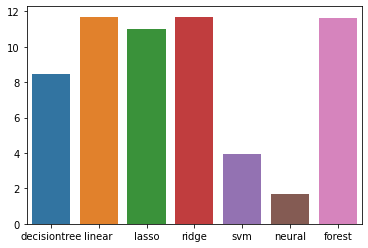

In [46]:
from seaborn import barplot
perfomance_names = list(perfomance.keys())
accuracy = list(map(float, perfomance.values()))
barplot(perfomance_names, accuracy)

# **CONCLUSION:**

**Random Forest Regression is the best ML model for predicting Age of a person using Glucose,Insulin,BMI,BloodPressure as features **